In [ ]:
## INTERNSHIP TASK(IDENTIFY PRODUCT IMAGE IN STORE IMAGE) ##


### FEATURE MATCHING USING AN OPENCV ALGORITHM "FLANN MATCHER"###

83 (1320.0076904296875, 1241.8524169921875)


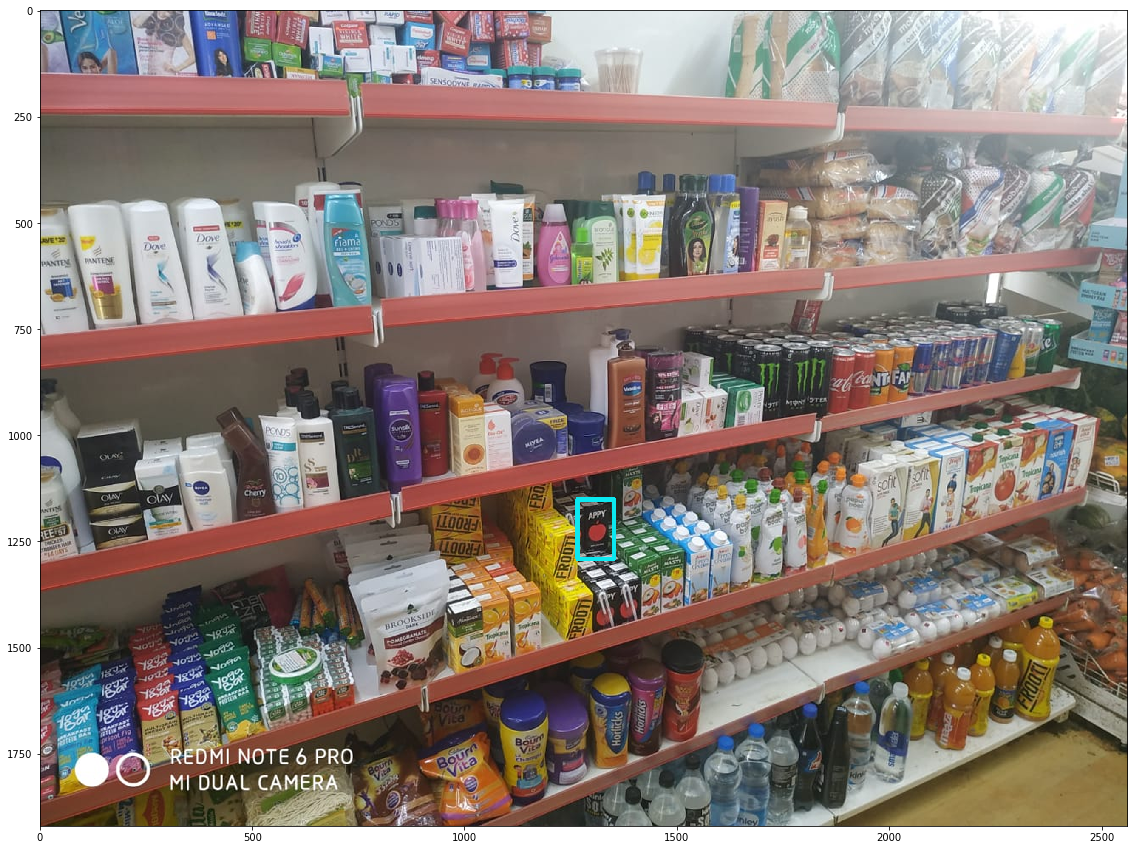

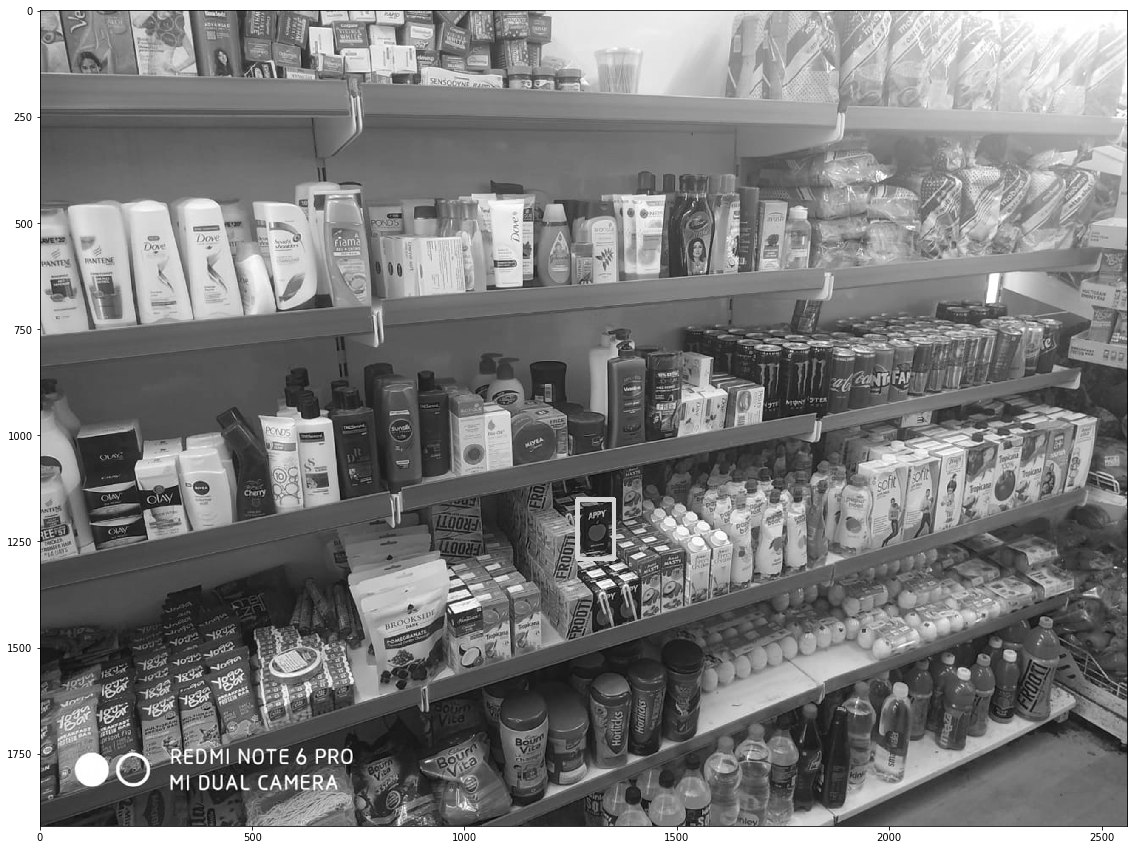

In [114]:
#IMPORTING VARIOUS DEPENDENCIES 
import cv2
import numpy as np
import matplotlib.pyplot as plt

#TO MAKE SURE THAT IMAGE WILL BE SHOWN IN SAME WINDOW
%matplotlib inline

#FUNCTION TO DISPLAY IMAGE IN OUR REQUIRED SIZE
def display(img, cmap='gray'):
    
    fig = plt.figure(figsize = (20,15))
    ax = fig.add_subplot(111)
    
    ax.imshow(img, cmap='gray')

    
#READING STORE IAMGE FROM THE FOLDER
store = cv2.imread('T2-Store-1.jpeg')


#RESIZING THE STORE IMAGE USING CUBIC INTERPOLATION SO THAT "APPY PORTION"(PRODUCT IMAGE)  WILL BE LARGER IN STORE IMAGE
store = cv2.resize(store, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)


#READING PRODUCT IMAGE FROM THE FOLDER
appy = cv2.imread('appy.jpg')


#USING SIFT DETECTOR FOR IDENTIFYING PRODUCT IMAGE IN STORE IMAGE

#INITIATING THE SIFT DETECTOR
sift = cv2.xfeatures2d.SIFT_create()



#FINDING THE KEYPOINTS AND DESCRIPTORS WITH SIFT
kp1, des1 = sift.detectAndCompute(appy,  None)
kp2, des2 = sift.detectAndCompute(store, None)



#DEFINING AND INITIALIZING PARAMETERS FOR THE FLANN ALGORITHM
FLANN_INDEX_KDTREE = 0
index_params       = dict(algorithm = FLANN_INDEX_KDTREE, trees = 20)
search_params      =  dict(checks = 50)



#CREATING THE OBJECT OF FLANN MATCHER FROM OPENCV
flann = cv2.FlannBasedMatcher(index_params, search_params)



#FINDING THE MATCHES USING FLANN MATHCER
matches = flann.knnMatch(des1, des2, k = 2)



#NEED TO DRAW ONLY GOOD MATCHES, SO CREATING A MASK
matchesMask = [[0,0] for i in range(len(matches))]



# RATIO TEST
for i, (match1, match2) in enumerate(matches):
    
    #WE ARE STORING THE MATCH TO LATER DRAW IT BY CALCULATING DISTANCE BETWEEN PRODUCT IMAGE AND STORE IMAGE
    if match1.distance < 0.55 * match2.distance:
        matchesMask[i] = [1,0]
        
        #STORING THE POINT LATER TO DRAW THE RECTANGLE AROUND THAT POINT(MATCH IN STORE IMAGE OF THE PRODUCT IMAGE)
        pt = kp2[match1.trainIdx].pt
        
        #PRINTING THAT POINT
        print(i, pt)


#VARIOUS PARAMETER FOR DRAWING THE MATCHES ON THE STORE IMAGE OF THE PRODUCT IMAGE
draw_params = dict(matchColor       = (0, 255, 0),
                   singlePointColor = (255, 0, 255),
                   matchesMask      = matchesMask,
                   flags            = 0
                  )


#DRAWING THE MATCHES ON STORE IMAGE
flann_matches = cv2.drawMatchesKnn(appy, kp1, store, kp2, matches, None, **draw_params)


#AS IMAGE IS STORED IN BGR FORMAT IN OPENCV SO CONVERTING THE BGR FORMAT TO RGB FORMAT(IMAGE WITH FLANN MATCHES)
flann_matches = cv2.cvtColor(flann_matches, cv2.COLOR_BGR2RGB)


#CONVERING THE IMAGE WITH RECTANGLE ON STORE IMAGE(INDENTIFIED PRODUCT IMAGE) FROM BGR FORMAT TO RGB FORMAT
store = cv2.cvtColor(store, cv2.COLOR_BGR2RGB)


#DRAWING THE RECTANGLE ON THE STORE IMAGE AROUND THE IDENTIFIED PRODUCT PORTION
cv2.rectangle(store, (int(pt[0])-55, int(pt[1])-90), (int(pt[0])+30, int(pt[1])+50), (12, 232, 240), 10)


#DISPLAYING THE STORE IMAGE IN RGB FORMAT
display(store)


#CONVERTING THE STORE IMAGE FROM RGB TO GRAYSCALE IMAGE 
store = cv2.cvtColor(store, cv2.COLOR_BGR2GRAY)


#DISPLAYING THE STORE IMAGE WITH RECTANGLE ON THE IDENTIFIED PR0DUCT IMAGE IN GRAYSCALE FORMAT
display(store)